In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display

In [22]:
def peaks(x,y):
    x,y = np.meshgrid(x,y)
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
    - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
    - 1/3*np.exp(-(x+1)**2 - y**2)
    return z
'''
def peaks(x,y):
    x,y = np.meshgrid(x,y)
    z = 5*x**2 + 3*y**2 + 3*x + 6*y
    return z
'''

'\ndef peaks(x,y):\n    x,y = np.meshgrid(x,y)\n    z = 5*x**2 + 3*y**2 + 3*x + 6*y\n    return z\n'

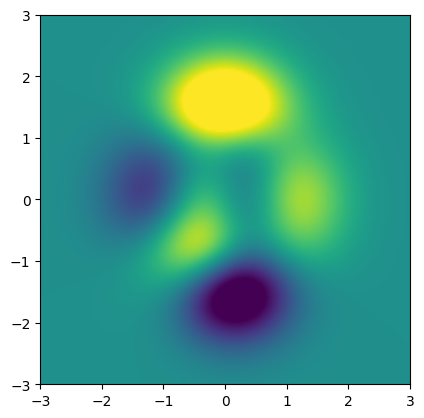

In [23]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x,y)

plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin="lower")
plt.show()

In [27]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
    - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
    - 1/3*sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify( (sx,sy), sym.diff(sZ,sx), 'sympy' )
df_y = sym.lambdify( (sx,sy), sym.diff(sZ,sy), 'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [29]:
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([ df_x(localmin[0], localmin[1]).evalf(),
                      df_y(localmin[0], localmin[1]).evalf()
                    ])
    localmin = localmin - learning_rate * grad
    trajectory[i,:]

print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[ 1.57879798 -1.04654925]


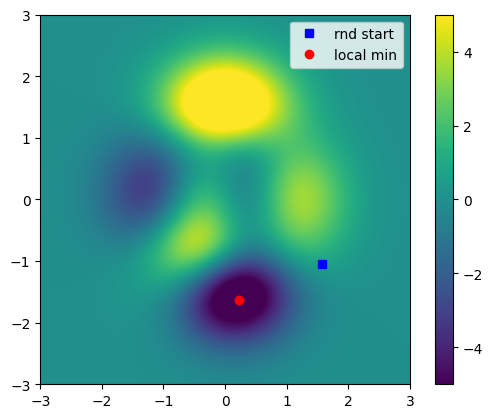

In [30]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin="lower")
plt.plot(startpnt[0],startpnt[1],"bs")
plt.plot(localmin[0],localmin[1],"ro")
plt.plot(trajectory[:,0],trajectory[:,1],"r")
plt.legend(["rnd start", "local min"])
plt.colorbar()
plt.show()